In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

from skimage.filters import rank

In [2]:
def sliding_window_adaptive_histogram_equalization(image, window_size):
  """Implmentation of the SWAHE algorithm

  Args:
      image (np.ndarray): image in gray scale
      window_size (tuple2): a tuple for creating the sliding window

  Returns:
      np.ndarray: the return image
  """
  rows, cols = image.shape
  # Creates the output image with zeros
  output_image = np.zeros_like(image)

  # Create a Window Matrix
  window = np.ones(window_size)
  
  # Create the window sliding matrices
  local_hist = rank.windowed_histogram(image, window, n_bins=256)
  
  # iterate over the rows and cols of an image
  for i in range(rows):
    for j in range(cols):
      # create the cumulative distribution function for the local histogram
      cdf = np.cumsum(local_hist[i,j,:]) / np.sum(local_hist[i,j,:])      
      # search in the cdf for the image intensity and i,j and multiply by 255
      output_image[i, j] = cdf[image[i,j]] * 255
  
  return output_image

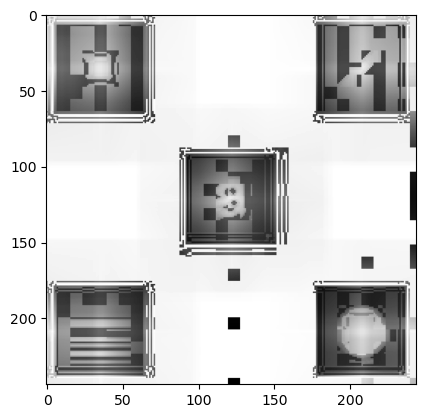

In [3]:
img = cv2.imread('../datasets/image3.bmp', cv2.IMREAD_GRAYSCALE)

res = sliding_window_adaptive_histogram_equalization(img, (60,60))

plt.imshow(res, cmap='gray')

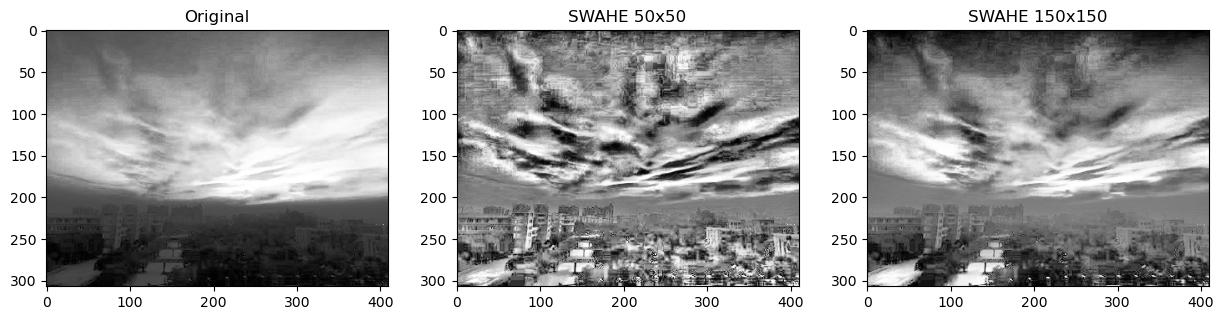

In [4]:
img = cv2.imread('../datasets/image4.bmp', cv2.IMREAD_GRAYSCALE)

res1 = sliding_window_adaptive_histogram_equalization(img, (50,50))
res2 = sliding_window_adaptive_histogram_equalization(img, (150,150))

fig, axes = plt.subplots(1,3, figsize=(15,9))

axes[0].set_title("Original")
axes[0].imshow(img, cmap='gray')
axes[1].set_title("SWAHE 50x50")
axes[1].imshow(res1, cmap='gray')
axes[2].set_title("SWAHE 150x150")
axes[2].imshow(res2, cmap='gray')